<img src="https://www3.um.edu.uy/logoum.jpg" width=300>
<h1 align="center">Thesis - ALS MAE</h1> 
<h2 align="center">Alejo Paullier</h2> 

https://lkpy.lenskit.org/en/stable/knn.html

In [1]:
from lenskit import batch, topn, util
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als
from lenskit.algorithms.als import BiasedMF
from lenskit.metrics.predict import mae
import pandas as pd
import numpy as np

ratings = pd.read_csv('D:\\Escritorio\\UM\\Tesis\\ML 1M\\ratings.dat', sep='::',engine='python',
                      names=['user', 'item', 'rating', 'timestamp'])


def eval(aname, algo, train, test):
    fittable = util.clone(algo) # Object cloning means to create an exact copy of the original object.
    fittable = Recommender.adapt(fittable) 
    fittable.fit(train) # train the algorithm with the training dataset
    # Now we run the recommender:
    preds = batch.predict(fittable, test)
    # add the algorithm name for analyzability
    return preds

In [2]:
def model_trainer(features,reg):
    all_recs = []
    test_data = []
    features=int(features)
    als = BiasedMF(features=features, iterations=100, reg=reg, damping=5, bias=True,  progress=None) # define algorithm
    
    for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 5, xf.SampleFrac(0.2)):
        test_data.append(test) # save testing data
        all_recs.append(eval('ALS', als, train, test))
    
    all_recs = pd.concat(all_recs, ignore_index=True)

    metric = mae(all_recs['prediction'], all_recs['rating'])
    return metric

In [3]:
from hyperopt import fmin, tpe, hp, STATUS_OK

def objective(params):
    features = params['features']
    reg = params['reg']
    metric = model_trainer(features,reg)
    print([features,reg,metric],',')
    return {'loss': metric, 'status': STATUS_OK}

space={'features': hp.uniform('features', 1, 100),
       'reg': hp.uniform('reg',0.01,0.4)}

best = fmin(objective, space, algo=tpe.suggest,max_evals=100)

[19.303460736633646, 0.3551247177358266, 0.6785702396462067]                                                           
,                                                                                                                      
[83.8923533310161, 0.3131131091697336, 0.6814218541579566]                                                             
,                                                                                                                      
[75.05738095414502, 0.21534052596164616, 0.6797570119150009]                                                           
,                                                                                                                      
[65.02540539811325, 0.38399296141982897, 0.6793558728717427]                                                           
,                                                                                                                      
[2.2768854211837897, 0.18108221173584724

[31.026057998646927, 0.15711328955285864, 0.6805556013214845]                                                          
,                                                                                                                      
[91.7820409400519, 0.36082257412820107, 0.678495590444423]                                                             
,                                                                                                                      
[59.666510706770396, 0.29932615381298516, 0.6807702788973163]                                                          
,                                                                                                                      
[67.88902613584784, 0.23895524269059532, 0.6788829963158499]                                                           
,                                                                                                                      
[42.77882916838595, 0.3309511200111748, 

[56.23355871085536, 0.2308814322679119, 0.6773999205740066]                                                            
,                                                                                                                      
[72.88476093052478, 0.26176169782760716, 0.681007356577763]                                                            
,                                                                                                                      
[57.959682217985566, 0.23267339346747334, 0.6790745099581709]                                                          
,                                                                                                                      
[32.993549254207736, 0.2543760726143071, 0.6788808703442627]                                                           
,                                                                                                                      
[89.337958173201, 0.17677365963942096, 0

In [4]:
array = [[19.303460736633646, 0.3551247177358266, 0.6785702396462067]                #212.62                                           
,                                                                                                                      
[83.8923533310161, 0.3131131091697336, 0.6814218541579566]                                                             
,                                                                                                                      
[75.05738095414502, 0.21534052596164616, 0.6797570119150009]                                                           
,                                                                                                                      
[65.02540539811325, 0.38399296141982897, 0.6793558728717427]                                                           
,                                                                                                                      
[2.2768854211837897, 0.18108221173584724, 0.6944256174472566]                                                          
,                                                                                                                      
[94.69470448240719, 0.019122977672051143, 0.6787846232363159]                                                          
,                                                                                                                      
[63.39813979727612, 0.1890531332096195, 0.6799341948320607]                                                            
,                                                                                                                      
[56.256669481862474, 0.37729825188310867, 0.6805856007838647]                                                          
,                                                                                                                      
[29.093983192912706, 0.09122714089804787, 0.6813691381386542]                                                          
,                                                                                                                      
[86.74319517303779, 0.21730539494883028, 0.680645181572343]                                                            
,                                                                                                                      
[4.5967462536287735, 0.13668196529013554, 0.6863189455089506]                                                          
,                                                                                                                      
[36.02119832274141, 0.338981931960905, 0.6795911899589351]                                                             
,                                                                                                                      
[20.52537152964945, 0.2614676353754722, 0.6799839496338957]                                                            
,                                                                                                                      
[75.31063723710548, 0.18961786347595905, 0.680669518517702]                                                            
,                                                                                                                      
[7.695109877732734, 0.20291000608306817, 0.6826914890746233]                                                           
,                                                                                                                      
[68.55184330532138, 0.08580494323581564, 0.6801497736953617]                                                           
,                                                                                                                      
[18.8219329761242, 0.02509954587724807, 0.6800138867653086]                                                            
,                                                                                                                      
[77.61756772448624, 0.10502452552472355, 0.6794818176071629]                                                           
,                                                                                                                      
[82.12236692517918, 0.024540185418650173, 0.6789933613147301]                                                          
,                                                                                                                      
[25.627724776946884, 0.18592142055193828, 0.6799880510705915]                                                          
,                                                                                                                      
[45.455566654161586, 0.27210718980768933, 0.6786089090822084]                                                          
,                                                                                                                      
[41.24789286228868, 0.2846160864719967, 0.6787150018122543]                                                            
,                                                                                                                      
[47.94921989951595, 0.3311520604802486, 0.6782505078314298]                                                            
,                                                                                                                      
[55.334857768948964, 0.34775758058333384, 0.6778247429647811]                                                          
,                                                                                                                      
[53.310744748892, 0.3987053379505029, 0.680292202692867]                                                               
,                                                                                                                      
[47.83059777924294, 0.3165274843109396, 0.6793228078911113]                                                            
,                                                                                                                      
[56.42733038610971, 0.24888530713031842, 0.6805585415566834]                                                           
,                                                                                                                      
[36.383862530667315, 0.30059042525640367, 0.6793594584188154]                                                          
,                                                                                                                      
[97.55778402988554, 0.34987637737856425, 0.6785064113511787]                                                           
,                                                                                                                      
[60.62976902447708, 0.37214830681324246, 0.6811550664267182]                                                           
,                                                                                                                      
[69.61594141270122, 0.33975749157952817, 0.6789282898307718]                                                           
,                                                                                                                      
[41.595458532393884, 0.24173886900853137, 0.6809776808089093]                                                          
,                                                                                                                      
[11.11607310850733, 0.39948430270897356, 0.6820817286833469]                                                           
,                                                                                                                      
[49.31652069081754, 0.3156506938193517, 0.6804476500818353]                                                            
,                                                                                                                      
[31.026057998646927, 0.15711328955285864, 0.6805556013214845]                                                          
,                                                                                                                      
[91.7820409400519, 0.36082257412820107, 0.678495590444423]                                                             
,                                                                                                                      
[59.666510706770396, 0.29932615381298516, 0.6807702788973163]                                                          
,                                                                                                                      
[67.88902613584784, 0.23895524269059532, 0.6788829963158499]                                                           
,                                                                                                                      
[42.77882916838595, 0.3309511200111748, 0.6788743929662843]                                                            
,                                                                                                                      
[52.19440464849217, 0.3971856488764273, 0.6798783274932618]                                                            
,                                                                                                                      
[33.33940749157557, 0.3721265954948063, 0.6788696682276907]                                                            
,                                                                                                                      
[25.11006667622757, 0.22105904165409695, 0.6798474604950321]                                                           
,                                                                                                                      
[81.33909765131759, 0.29362217719967665, 0.6785012432746398]                                                           
,                                                                                                                      
[71.56031049035437, 0.050557364531733984, 0.6800256801405846]                                                          
,                                                                                                                      
[63.93036349177991, 0.16234221199142962, 0.6814006599820391]                                                           
,                                                                                                                      
[87.3438566595025, 0.27084724778722324, 0.6795232341367946]                                                            
,                                                                                                                      
[37.598158373817654, 0.3860363768824566, 0.6785807920850514]                                                           
,                                                                                                                      
[15.139742211731345, 0.3261066777321341, 0.6799251484390182]                                                           
,                                                                                                                      
[58.40375279818997, 0.35869575015436794, 0.679259922256698]                                                            
,                                                                                                                      
[54.20517456846985, 0.12042124311047286, 0.6779640367832663]                                                           
,                                                                                                                      
[74.34684311382959, 0.11374678724180382, 0.6803427086361187]                                                           
,                                                                                                                      
[63.80757429844532, 0.056183537375357556, 0.6790261757995201]                                                          
,                                                                                                                      
[53.65032954303322, 0.12719774807371195, 0.6788250334125171]                                                           
,                                                                                                                      
[77.16065030413417, 0.06806429836964832, 0.6794908652852972]                                                           
,                                                                                                                      
[24.433441649565513, 0.1611952555479576, 0.6808691521481269]                                                           
,                                                                                                                      
[45.11728954687847, 0.08507254968908601, 0.6792721768561234]                                                           
,                                                                                                                      
[85.3860862960321, 0.20058044291223914, 0.6812859911696911]                                                            
,                                                                                                                      
[79.81510201759824, 0.1410539664858435, 0.6801207105177793]                                                            
,                                                                                                                      
[93.19536140418768, 0.014156863378553625, 0.6790641545218791]                                                          
,                                                                                                                      
[2.3383211895908786, 0.10689117992534562, 0.6933477876905504]                                                          
,                                                                                                                      
[38.915089947954456, 0.17162556690688438, 0.6787928371331587]                                                          
,                                                                                                                      
[28.38200381914533, 0.22455410920886953, 0.6792364884671521]                                                           
,                                                                                                                      
[55.11107694167021, 0.030109674536108244, 0.6809247007778706]                                                          
,                                                                                                                      
[99.79025184348906, 0.1362908449097104, 0.6800914429256489]                                                            
,                                                                                                                      
[66.85088611033576, 0.19962721623060087, 0.6810879308535254]                                                           
,                                                                                                                      
[61.745652425996724, 0.27814975939869163, 0.678845774897074]                                                           
,                                                                                                                      
[47.667623679649886, 0.34381631265939255, 0.6793898179602348]                                                          
,                                                                                                                      
[50.78111877932985, 0.30708951776180093, 0.6793243426954422]                                                           
,                                                                                                                      
[56.23355871085536, 0.2308814322679119, 0.6773999205740066]                                                            
,                                                                                                                      
[72.88476093052478, 0.26176169782760716, 0.681007356577763]                                                            
,                                                                                                                      
[57.959682217985566, 0.23267339346747334, 0.6790745099581709]                                                          
,                                                                                                                      
[32.993549254207736, 0.2543760726143071, 0.6788808703442627]                                                           
,                                                                                                                      
[89.337958173201, 0.17677365963942096, 0.6785497429159345]                                                             
,                                                                                                                      
[44.005900459702985, 0.07789935905155915, 0.6793875107890334]                                                          
,                                                                                                                      
[61.68517366557334, 0.21159873215769356, 0.6786535871469306]                                                           
,                                                                                                                      
[40.40278676778931, 0.03880117716293295, 0.6812355821642827]                                                           
,                                                                                                                      
[56.15147914370706, 0.147192033896623, 0.6804688016132776]                                                             
,                                                                                                                      
[70.94975283522353, 0.11985006088292471, 0.6795510086331299]                                                           
,                                                                                                                      
[65.90336513051355, 0.18328674183888344, 0.6789172291837103]                                                           
,                                                                                                                      
[50.227915954553616, 0.10327232771795568, 0.6799647814836074]                                                          
,                                                                                                                      
[21.2340950194801, 0.09685511881908182, 0.6794131389273372]                                                            
,                                                                                                                      
[46.616019787296636, 0.19385171828830242, 0.6805184799365362]                                                          
,                                                                                                                      
[68.87992365940012, 0.15414374986340593, 0.6798522339942408]                                                           
,                                                                                                                      
[53.09473000793519, 0.28657414758441124, 0.6801869014104347]                                                           
,                                                                                                                      
[77.7645319109372, 0.16938096243497194, 0.6785630584572772]                                                            
,                                                                                                                      
[35.08658371430553, 0.06703818284744334, 0.6792106328972503]                                                           
,                                                                                                                      
[58.95903155644305, 0.23106280506504273, 0.6773355588528893]                                                           
,                                                                                                                      
[83.80029120685924, 0.32352460339577527, 0.6799606191849191]                                                           
,                                                                                                                      
[29.19130093760281, 0.23160163987159688, 0.6799480085486878]                                                           
,                                                                                                                      
[74.54775739194497, 0.21200988506312932, 0.6793090854291451]                                                           
,                                                                                                                      
[58.03074383379225, 0.253906281399864, 0.6776034837686938]                                                             
,                                                                                                                      
[59.11019917566926, 0.26132304284922925, 0.681099691597885]                                                            
,                                                                                                                      
[65.33282561926944, 0.24502554864622744, 0.6807635424943177]                                                           
,                                                                                                                      
[62.6283263376275, 0.27387857898061846, 0.6822827412477873]                                                            
,                                                                                                                      
[42.234788365928466, 0.25157376740921117, 0.6779431939483221]                                                          
,                                                                                                                      
[79.94004884349579, 0.19088939254533133, 0.6796300494343224]                                                           
,                                                                                                                      
[50.20158100828009, 0.292706305553014, 0.6802980746166397]                                                             
,                                                                                                                      
[57.502835307867244, 0.30834211002344825, 0.6794992505194749]                                                          
,                                                                                                                      
[39.41292359334722, 0.23357384754731977, 0.6809670261740606]                                                           
,                                                                                                                      
[96.64454828008175, 0.26212136860756274, 0.681078231603813]  ]

In [5]:
metric = pd.DataFrame(array)
metric.columns = ['features','reg','MAE']
metric.head(5)

,features,reg,MAE
0,19.303461,0.355125,0.678570
1,83.892353,0.313113,0.681422
2,75.057381,0.215341,0.679757
3,65.025405,0.383993,0.679356
4,2.276885,0.181082,0.694426


In [6]:
metric.sort_values(by=['MAE'],ascending=True).head(10)

,features,reg,MAE
86,58.959032,0.231063,0.677336
68,56.233559,0.230881,0.677400
90,58.030744,0.253906,0.677603
23,55.334858,0.347758,0.677825
94,42.234788,0.251574,0.677943
49,54.205175,0.120421,0.677964
22,47.949220,0.331152,0.678251
35,91.782041,0.360823,0.678496
42,81.339098,0.293622,0.678501
28,97.557784,0.349876,0.678506


In [7]:
metric.to_csv('metric_MAE.csv', index=False)

In [4]:
metric = pd.read_csv('C:\\Users\\Alejo\\Tesis\\Algoritmos\\Alternating Least Squares\\results\\metric_MAE.csv')

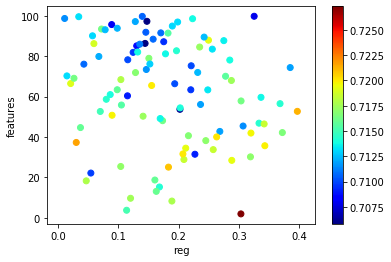

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
colormap = cm.hot
x = metric['reg']
y = metric['features'] 
c = metric['MAE']


fig = plt.figure()
img = plt.scatter(x, y, c=c, cmap=plt.jet())
plt.xlabel('reg')
plt.ylabel('features')
fig.colorbar(img)
plt.show()